In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

In [2]:
from statsmodels.tsa.stattools import adfuller
from pandas_datareader import data as wb
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [3]:
AA_pop= pd.read_csv('aa_population.csv')
county = pd.read_csv('County_Cases.csv')
population= pd.read_csv('population.csv')

In [4]:
AA_pop.tail()

,County,Value
95,Wayne,32.3
96,Wilkes,4.7
97,Wilson,40.4
98,Yadkin,3.5
99,Yancey,1.1


In [5]:
county.tail()

,County,Cases,Deaths
95,Wayne,4899,92
96,Wilkes,1972,41
97,Wilson,3290,69
98,Yadkin,1134,11
99,Yancey,365,2


In [6]:
population.tail()

,County,Population
95,Wayne County,"123,131"
96,Wilkes County,"68,412"
97,Wilson County,"81,801"
98,Yadkin County,"37,667"
99,Yancey County,"18,069"


In [7]:
df = pd.DataFrame()

df = county.copy()
df['% Black'] = AA_pop.Value.div(100)

del df['Cases']
df['Population'] = population.Population 
df

,County,Deaths,% Black,Population
0,Alamance,90,0.206,"169,509"
1,Alexander,12,0.059,"37,497"
2,Alleghany,1,0.019,"11,137"
3,Anson,13,0.486,"24,446"
4,Ashe,3,0.010,"27,203"
...,...,...,...,...
95,Wayne,92,0.323,"123,131"
96,Wilkes,41,0.047,"68,412"
97,Wilson,69,0.404,"81,801"
98,Yadkin,11,0.035,"37,667"


In [8]:
df.set_index('County', inplace=True)
df.head()
#df.to_csv('dataframe.csv')

,Deaths,% Black,Population
County,,,
Alamance,90,0.206,"169,509"
Alexander,12,0.059,"37,497"
Alleghany,1,0.019,"11,137"
Anson,13,0.486,"24,446"
Ashe,3,0.010,"27,203"


In [9]:
df_comp = pd.read_csv('dataframe.csv')

## Analyzing the Data

In [10]:
print('Correlation Matrix:\n' + str(df_comp.corr()) +"\n \n" + 'Covariance Matrix:\n' +str(df_comp.cov()))

Correlation Matrix:
                  Deaths   % Black  Mortality Rate
Deaths          1.000000  0.157423        0.072697
% Black         0.157423  1.000000        0.513921
Mortality Rate  0.072697  0.513921        1.000000
 
Covariance Matrix:
                     Deaths   % Black  Mortality Rate
Deaths          3265.302626  1.486316      147.310561
% Black            1.486316  0.027300        3.011148
Mortality Rate   147.310561  3.011148     1257.499958


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


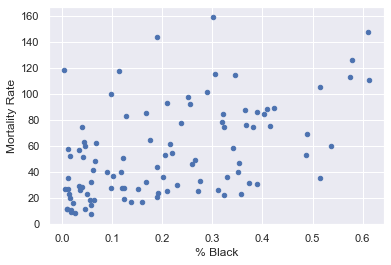

In [11]:
df_comp.plot.scatter(x='% Black', y='Mortality Rate')

In [14]:
y = df_comp['Mortality Rate']
x = df_comp['% Black']
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality Rate   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     35.17
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.54e-08
Time:                        17:48:27   Log-Likelihood:                -482.90
No. Observations:                 100   AIC:                             969.8
Df Residuals:                      98   BIC:                             975.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3849      4.929      6.367      0.000      21.603      41.167
% Black      110.2982     18.598      5.931      0.000      73.391     147.205
==============================================================================
Omnibus:                       15.293   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.053
Skew:                           0.922   Prob(JB):                     0.000198
Kurtosis:                       3.831   Cond. No.                         6.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""